In [1]:
import matplotlib.pyplot as plt

In [8]:
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

In [9]:
def compute_outcode(x, y, xmin, xmax, ymin, ymax):
    code = INSIDE

    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT

    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP

    return code

In [10]:
def clip_line(x1, y1, x2, y2, xmin, xmax, ymin, ymax):
    outcode1 = compute_outcode(x1, y1, xmin, xmax, ymin, ymax)
    outcode2 = compute_outcode(x2, y2, xmin, xmax, ymin, ymax)
    accept = False

    while True:
        if not (outcode1 | outcode2):
            accept = True
            break

        if outcode1 & outcode2:
            break

        x = 0
        y = 0

        outcode = outcode1 or outcode2

        if outcode & TOP:
            x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
            y = ymax
        elif outcode & BOTTOM:
            x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
            y = ymin
        elif outcode & RIGHT:
            y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
            x = xmax
        elif outcode & LEFT:
            y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
            x = xmin

        if outcode == outcode1:
            x1 = x
            y1 = y
            outcode1 = compute_outcode(x1, y1, xmin, xmax, ymin, ymax)
        else:
            x2 = x
            y2 = y
            outcode2 = compute_outcode(x2, y2, xmin, xmax, ymin, ymax)

    if accept:
        plt.plot([x1, x2], [y1, y2], 'b')
        plt.axis('equal')
        plt.show()
    else:
        print("Line outside the clipping window")


In [3]:
# take input from user
x1 = float(input("Enter x1: "))
y1 = float(input("Enter y1: "))
x2 = float(input("Enter x2: "))
y2 = float(input("Enter y2: "))
xmin = float(input("Enter xmin: "))
xmax = float(input("Enter xmax: "))
ymin = float(input("Enter ymin: "))
ymax = float(input("Enter ymax: "))

Enter x1: 1
Enter y1: 1
Enter x2: 5
Enter y2: 3
Enter xmin: 1
Enter xmax: 5
Enter ymin: 0
Enter ymax: 4


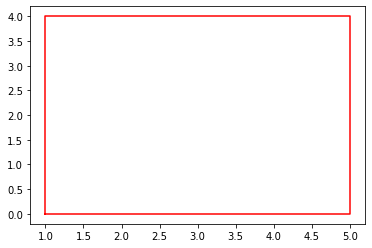

In [11]:
# plot the clipping window
plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r')

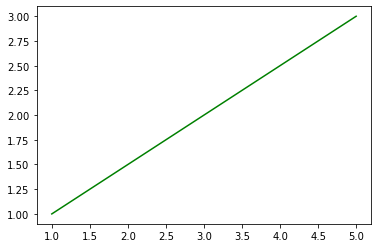

In [12]:
# plot the original line segment
plt.plot([x1, x2], [y1, y2], 'g')

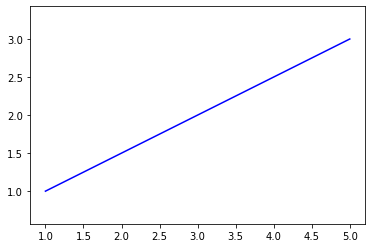

In [13]:
# clip the line segment and plot the result
clip_line(x1, y1, x2, y2, xmin, xmax, ymin, ymax)